# Interpolation of data
- Börge Göbel

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import math

## 1. Taylor expansion

You can expand any continuous function as a polynomials

\\( f(x)=\sum_{n=0}^\infty \frac{1}{n!}f^{(n)}(x_0)\,(x-x_0)^n\\)

Here, \\( f^{(n)} \\) is the nth derivative and \\( x_0 \\) is the argument around which we expand the function

### 1.1 Example: Exponential function

\\( f(x)=f'(x)=f''(x)=\dots=f^{(n)}(x)=\exp(x) \\)

In [43]:
def expTaylor(x, x0, nmax):
    # x: Argument
    # x0: Argument at which the derivative will be calculated
    # nmax: n at which series terminates
    t = 0
    for n in range(nmax+1):
        t = t + np.exp(x0) * (x-x0)**n / np.math.factorial(n)
        return t

In [50]:
expTaylor(1, 0, 10)

C:\Users\kings\AppData\Local\Temp\ipykernel_19196\1475824918.py:7: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  t = t + np.exp(x0) * (x-x0)**n / np.math.factorial(n)


1.0

In [46]:
expTaylor(2,1,20)

C:\Users\kings\AppData\Local\Temp\ipykernel_19196\1475824918.py:7: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  t = t + np.exp(x0) * (x-x0)**n / np.math.factorial(n)


2.718281828459045

C:\Users\kings\AppData\Local\Temp\ipykernel_19196\1475824918.py:7: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  t = t + np.exp(x0) * (x-x0)**n / np.math.factorial(n)


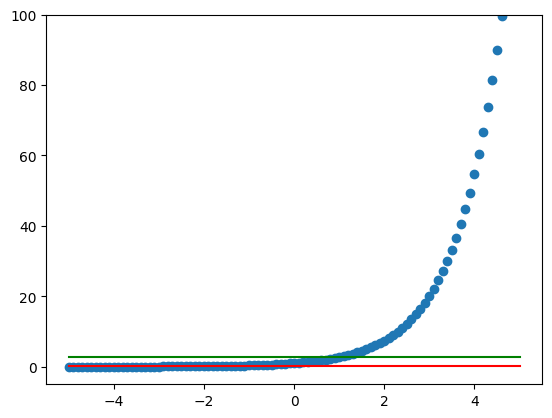

In [53]:
plt.ylim([-5,100])
x_list = np.linspace(-5,5,101)
plt.scatter(x_list,np.exp(x_list))

nmax = 5
plt.plot(x_list, expTaylor(x_list, 5, nmax), 'blue')
plt.plot(x_list, expTaylor(x_list, 1, nmax), 'green')
plt.plot(x_list, expTaylor(x_list, -2, nmax), 'red')

### 1.2 Example: sin function at \\(x_0 = 0\\)

\\( f(0) = f''(0) = f^{(4)}(0) = \dots = 0 \\)

\\( f'(0) = f^{(5)}(0) = f^{(9)}(0) = \dots = 1 \\)

\\( f'''(0) = f^{(7)}(0) = f^{(11)}(0) = \dots = -1 \\)

\\( \sin(x) = x - \frac{1}{3!}x^3 + \frac{1}{5!}x^5  - \frac{1}{7!}x^7 \pm \dots = \sum_{n=0}^\infty \frac{(-1)^n}{(2n+1)!}x^{2n+1}\\)

In [63]:
def sinTaylor(x, nmax):
    # x: Argument
    # xmax: Argument at which the derivative will terminate
    t = 0
    for n in range(nmax+1):
        t = t + (-1)**n) * (x**(2*n+1) / np.math.factorial(2*n+1)
    return t

SyntaxError: unmatched ')' (61222730.py, line 6)

C:\Users\kings\AppData\Local\Temp\ipykernel_19196\1694251252.py:6: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  t = t + ((-1)**n) * (x**(2*n+1)) / np.math.factorial(2*n+1)


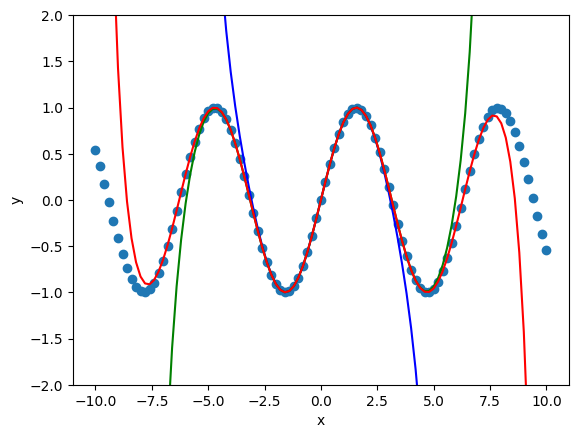

In [64]:
plt.xlabel('x')
plt.ylabel('y')
plt.ylim([-2,2])

x_list = np.linspace(-10,10,101)
plt.scatter(x_list,np.sin(x_list))

nmax = 5
plt.plot(x_list, sinTaylor(x_list, 3), 'blue')
plt.plot(x_list, sinTaylor(x_list, 6), 'green')
plt.plot(x_list, sinTaylor(x_list, 9), 'red')

- Accuracy of \\( \sin(10.5) \\)

In [65]:
np.sin(10.5) - sinTaylor(10.5,50)

C:\Users\kings\AppData\Local\Temp\ipykernel_19196\1694251252.py:6: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  t = t + ((-1)**n) * (x**(2*n+1)) / np.math.factorial(2*n+1)


-2.844391389089651e-13

### 1.3 Implementation of a general function

Derivative (more details in separate section): \\( f'(x) = \lim_{h\rightarrow 0} \frac{f(x+h)-f(x)}{h} \\)

In [75]:
def derivative(f, x, h):
    return (f(x+h) - f(x)) / h

In [70]:
def func(x):
    return 2*np.sin(x)**2 + x

In [77]:
x0 = 10.5
h = 0.1

In [72]:
func(x0)

12.04772926022427

In [79]:
derivative(func, x0, h)

2.5529969724111723

Higher derivatives: \\( f^{(n)}(x) = \lim_{h\rightarrow 0} \frac{1}{h^n}\sum_{k=0}^n(-1)^{k+n} \,\frac{n!}{k!(n-k)!} \,f(x+kh)\\)

In [67]:
def nDerivative(f, x, h, n):
    t = 0
    for k in range(n+1):
        t = t + (-1)**(k+n) * np.math.factorial(n) / (np.math.factorial(k) * np.math.factorial(n-k)) * f(x+k*h)
    return t / h**n

In [83]:
nDerivative(func, x0, h, 10)

C:\Users\kings\AppData\Local\Temp\ipykernel_19196\1348106407.py:4: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  t = t + (-1)**(k+n) * np.math.factorial(n) / (np.math.factorial(k) * np.math.factorial(n-k)) * f(x+k*h)


-1007.0367473247182

## 2. Interpolation

### 2.1 Generate data points

Modify x and y values by adding random numbers

## 2.2 Spline interpolation

A spline interpolation always fits the data perfectly and even has a continuous derivative, if a cubic spline is used.

The spline is defined piecewise.

### 2.2.1 Unperturbed data

In [2]:
from scipy import interpolate

- linear splines

- zoom

- cubic spline

### 2.2.2 Perturbed data

- How to handle data which is not smooth?

## 2.3 Fitting a model function

Choose ideal parameters of a (physically motivated) model function such that error is minimized.

### 2.3.1 Define model function

For practice, we consider a polynomial: \\( f(x) = a_0 + a_1 x + a_2 x^2 + \dots + a_n x^n = \sum_{k=0}^n a_k x^k\\)

### 2.3.2 Define error 

There are many reasonable definitions of an error function but a very common choice is: \\( \Delta = \sum_{i=1}^n \left(y_i-f(x_i)\right)^2\\)

\\( f \\) is the fit function that is determined by the coefficients \\( a_i \\) in our case.

\\( (x_i, y_i) \\) are the data points that we try to fit.

### 2.3.3 Update coefficients to reduce the error (gradient descent)

We can use several different methods to minimize the error, e. g. a Monte-Carlo algorithm. Here, we will use the gradient descent method. The coefficients \\( a_i \\) will be updated along the gradient direction of the error function \\( \nabla_{\vec{a}} \Delta\\). The gradient consists of elements \\( \frac{\partial}{\partial a_k} \Delta = -2 \sum_{i=1}^n \left(y_i-f(x_i)\right) \frac{\partial}{\partial a_k}f(x_i) = -2 \sum_{i=1}^n \left(y_i-f(x_i)\right) x_i^{k}\\)

### 2.3.4 Loop for the actual fitting

- Comparison of a and a0